In [1]:
import lane_detection
import cv2
import matplotlib.pyplot as plt
import numpy as np
import lane_following

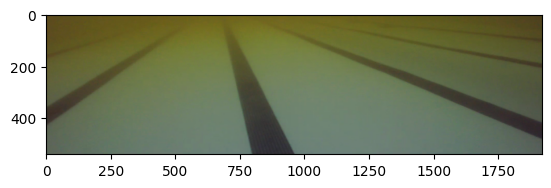

None


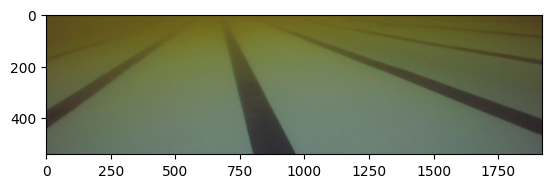

None


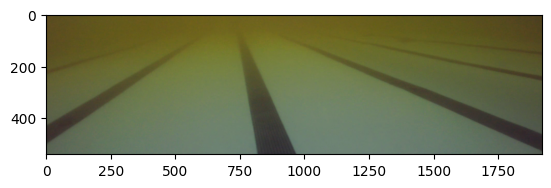

None


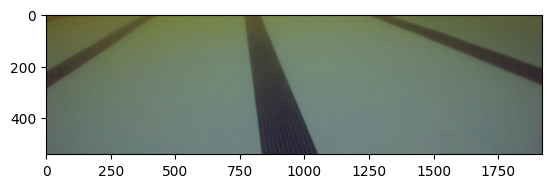

None


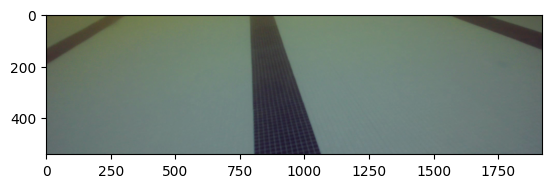

[[[ 968  261 1061  533]]

 [[ 990  322 1062  532]]

 [[ 969  268 1061  536]]]
[]


NameError: name 'img' is not defined

In [2]:
i = 0
cap = cv2.VideoCapture('AUV_Vid.mkv')

while True:
    ret, frame = cap.read()
    frame = frame[int(frame.shape[0]/2):int(frame.shape[0])]
    if i % 20 == 0:
        plt.imshow(frame)
        plt.show()
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        lines = lane_detection.detect_lines(frame, 100, 150, 3, 200, 20)
        print(lines)
        if lines is not None:
            lines = lane_detection.rmvExcessLines(lines)
            lanes = lane_detection.detect_lanes(lines)
            print(lanes)
            img = np.array(img)
            xInts, slopes = lane_following.get_lane_center(lanes, img.shape[1])
            img = lane_following.draw_lane_center(img, xInts, slopes, img.shape[0])
        
            plt.imshow(img)
            plt.show()
    if i == 300:
        break
    i += 1

In [ ]:
cap = cv2.VideoCapture('AUV_Vid.mkv')

ret, frame = cap.read()
real = frame.copy()
inverse = cv2.cvtColor(real,cv2.COLOR_BGR2RGB)
blur = cv2.GaussianBlur(inverse,(5,5),0)
plt.imshow(blur)
plt.show()



In [ ]:
gray = cv2.cvtColor(inverse.copy(), cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()


In [ ]:
thresh, bw = cv2.threshold(gray.copy(), 118, 135, cv2.THRESH_BINARY)
plt.imshow(bw)
plt.show()

In [ ]:
edges = cv2.Canny(bw.copy(), 130, 160, apertureSize=5)
plt.imshow(edges)

In [ ]:
lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/360,
                    80,
                    minLineLength=200,
                    maxLineGap=20,
            )

for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(frame, (x1, y1), (x2, y2), (0, 255, 0), 10)
plt.imshow(real)
plt.show()

In [ ]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
ret, frame = cap.read()
frame = frame[int(frame.shape[0]/2):int(frame.shape[0])]
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
lines = lane_detection.detect_lines(frame, 100, 150, 3, 200, 30)
img = lane_detection.draw_lines(frame.copy(), lines, (0, 255, 0))
plt.imshow(img)

In [15]:
from dt_apriltags import Detector
import cv2
import matplotlib.pyplot as plt

In [16]:
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)

In [17]:
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)

In [18]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [19]:
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)

In [20]:
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

In [21]:
for tag in tags:
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))

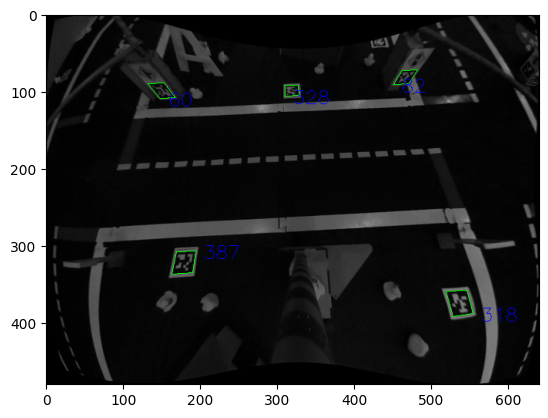

In [23]:
plt.imshow(color_img)